<a href="https://colab.research.google.com/github/sanjufvr/sample_project/blob/main/cv_bagging_boosting_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data loading

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath ='/content/drive/MyDrive/Colab Notebooks/data/iris.csv'
df_iris = pd.read_csv(filepath)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#preprocessing is not needed , its already pre processed

In [ ]:
#model building
x = df_iris.drop('species',axis=1)
y = df_iris['species']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_lr = LogisticRegression(max_iter=100)
model_dt = DecisionTreeClassifier()
model_knn = KNeighborsClassifier(n_neighbors=5)

cv_scores_lr = cross_val_score(model_lr, x, y, cv=kf)
print('logistic regression cross validation accuracy:', cv_scores_lr)
print('logistic regression cross validation mean accuracy:', cv_scores_lr.mean())

cv_scores_dt = cross_val_score(model_dt, x, y, cv=kf)
print('decision tree cross validation accuracy:', cv_scores_dt)
print('decision tree cross validation mean accuracy:', cv_scores_dt.mean())

cv_scores_knn = cross_val_score(model_knn, x, y, cv=kf)
print('knn  cross validation accuracy:', cv_scores_knn)
print('knn cross validation mean accuracy:', cv_scores_knn.mean())

logistic regression cross validation accuracy: [1.         1.         0.93333333 0.96666667 0.96666667]
logistic regression cross validation mean accuracy: 0.9733333333333334
decision tree cross validation accuracy: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
decision tree cross validation mean accuracy: 0.9533333333333335
knn  cross validation accuracy: [1.         1.         0.96666667 0.93333333 0.96666667]
knn cross validation mean accuracy: 0.9733333333333334


In [ ]:
#bagging
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

#normal decision tree traing
model_dt.fit(x_train,y_train)
y_pred_dt= model_dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print(f'accuracy of a simple decision tree model: {accuracy_dt}')

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42)
bagging_model.fit(x_train,y_train)

y_pred_bagging = bagging_model.predict(x_test)
accuracy_bagging = accuracy_score(y_test,y_pred_bagging)
print(f'accuracy of bagging decsion tree model: {accuracy_bagging}')

accuracy of a simple decision tree model: 1.0
accuracy of bagging decsion tree model: 1.0


In [ ]:
#boosting
print(f'accuracy of a simple decision tree model :{accuracy_dt}')

ada_boost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    learning_rate=0.1,
    random_state=42)

ada_boost_clf.fit(x_train,y_train)
y_pred_ada_boost = ada_boost_clf.predict(x_test)
accuracy_ada_boost = accuracy_score(y_test,y_pred_ada_boost)
print(f'accuracy of a boosting model : {accuracy_ada_boost}')

accuracy of a simple decision tree model :1.0
accuracy of a boosting model : 1.0


In [ ]:
#stacking
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

model_lr_1 = LogisticRegression(max_iter=120)
model_dt_1 = DecisionTreeClassifier()
model_knn_1 = KNeighborsClassifier(n_neighbors=3)

base_learners = [('lr', model_lr_1), ('dt', model_dt_1), ('knn', model_knn_1)]
meta_learner = GaussianNB()

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner)#stacking model building

stacking_clf.fit(x_train,y_train)#stacking model training
y_pred_stacking = stacking_clf.predict(x_test)#stack model prediction

accuracy_stack = accuracy_score(y_test, y_pred_stacking)
print(f'accuracy of a stacking model : {accuracy_stack}')

accuracy of a stacking model : 1.0


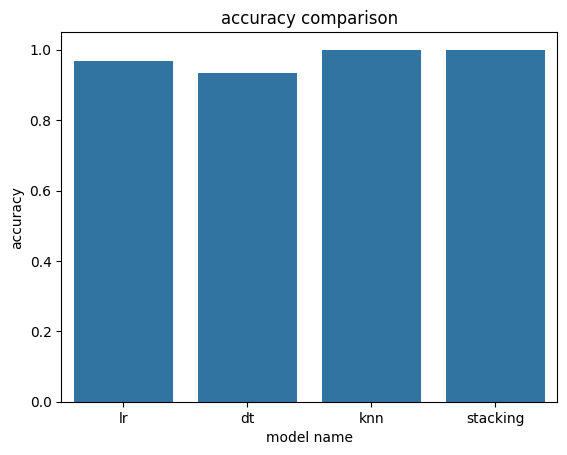

In [ ]:
#comparison of accuracies
results={}
for name, model in base_learners:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  results[name]= accuracy_score(y_test, y_pred)
  #populating results dictionary with name of the model and accuracy
results['stacking'] = accuracy_stack # adding the stack model accuracy

sns.barplot(x= list(results.keys()),y= list(results.values()))
plt.title('accuracy comparison')
plt.xlabel('model name')
plt.ylabel('accuracy')
plt.show()